# **Cardiovascular disease**

## **Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# **About the dataset**

In [2]:
health_data = pd.read_csv("health_data.csv")
print(health_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 7.5 MB
None


**About Dataset**  
**Data description**  

There are 3 types of input features:  

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.

Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 

In [3]:
health_data["Unnamed: 0"].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [4]:
health_data["id"].head()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: id, dtype: float64

In [5]:
health_data["age"].describe()

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

In [6]:
health_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [7]:
health_data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
numerical_data = health_data[['age','height', 'weight', 'ap_hi', 'ap_lo']]
correlations = numerical_data.corr()
correlations

,age,height,weight,ap_hi,ap_lo
age,1.000000,-0.081515,0.053684,0.020764,0.017647
height,-0.081515,1.000000,0.290968,0.005488,0.006150
weight,0.053684,0.290968,1.000000,0.030702,0.043710
ap_hi,0.020764,0.005488,0.030702,1.000000,0.016086
ap_lo,0.017647,0.006150,0.043710,0.016086,1.000000


Our dependent variable is "cardio".  
We want to predict how likely a patient with these features is to develop a cardiovascular disease.  
We need to find the best classifier model.  
I will start with these ones:  
- KNN
- Logistic regression
- Decision Tree Classifier

# **Preprocessing**

I have a high variance for age (in days). I will switch in years.

In [9]:
numerical_data.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


## **Age**

In [10]:
health_data["age_years"] = np.round(health_data["age"]/365.25)
health_data["age_years"].describe()

count    70000.000000
mean        53.303157
std          6.760171
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age_years, dtype: float64

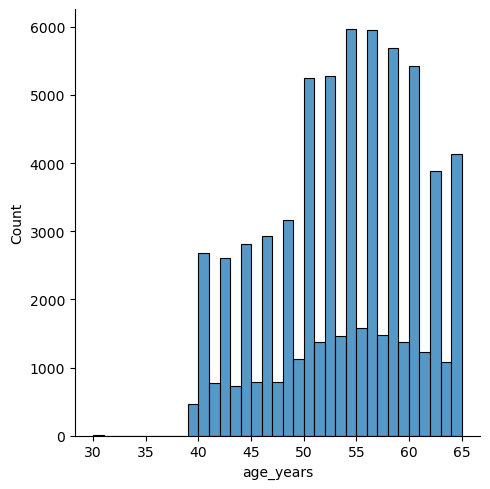

In [11]:
sns.displot(health_data["age_years"],bins=35)

Interesting distribution. Perhaps the patients have a free examination from 40 years and every 2 years. 

In [12]:
health_data.groupby("cardio")["age_years"].describe()

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,35021.0,51.696553,6.780419,30.0,46.0,52.0,57.0,65.0
1,34979.0,54.911690,6.344676,39.0,50.0,56.0,60.0,65.0


In [13]:
health_data.drop("age", axis=1, inplace=True)

## **weight**

In [14]:
health_data["weight"].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [15]:
unreasonnably_light = health_data[health_data["weight"] == 10]
unreasonnably_light

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
57858,1,165.0,10.0,180.0,1100.0,1,1,0,0,1,1,51.0


In [16]:
health_data.drop(unreasonnably_light.index, axis=0, inplace=True)

In [17]:
health_data["weight"].describe()

count    69999.000000
mean        74.206607
std         14.393814
min         11.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [21]:
from cardio_modules import Outliers

weight_outliers = Outliers(health_data,"weight")

min_outliers_weight = weight_outliers.outliers_min()
max_outliers_weight = weight_outliers.outliers_max()

overweight = health_data[health_data["weight"] >= max_outliers_weight]
under_weight = health_data[health_data["weight"] <= min_outliers_weight]
print(len(under_weight)/len(health_data))
len(overweight)/len(health_data)

0.000728581836883384


0.02524321776025372

In [22]:
under_weight.groupby("cardio")["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,32.0,34.889063,4.420658,22.0,32.75,36.0,38.0,39.0
1,19.0,33.473684,7.066104,11.0,32.00,36.0,38.0,39.0


In [23]:
health_data.drop(under_weight.index, axis=0, inplace=True)

In [24]:
overweight.groupby("cardio")["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,530.0,118.196981,12.737234,108.0,110.0,114.3,120.0,200.0
1,1237.0,118.997979,12.517432,108.0,110.0,115.0,123.0,200.0


I'm keeping the overweight

## **Height**

In [25]:
health_data["height"].describe()

count    69948.000000
mean       164.368874
std          8.199857
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

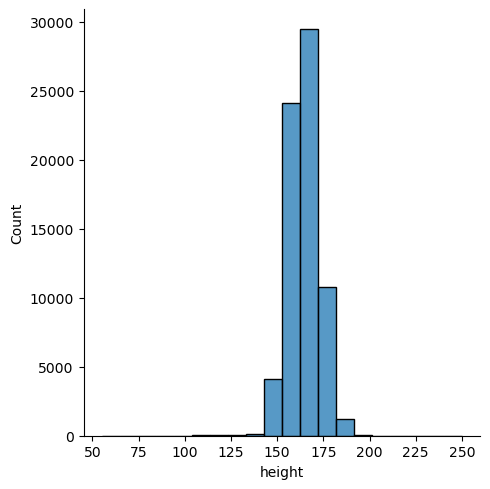

In [26]:
sns.displot(health_data["height"],bins=20)

In [27]:
height_outl = Outliers(health_data,"height")
min_height_outl = height_outl.outliers_min()
max_height_outl = height_outl.outliers_max()

giants = health_data[health_data["height"] >= max_height_outl]
dwarfs = health_data[health_data["height"] <= min_height_outl]

print(len(giants)/len(health_data))
print(len(dwarfs)/len(health_data))

0.0038457139589409277
0.003474009264024704
